### 1. imports

In [1]:
import torch
import matplotlib.pyplot as plt 

In [2]:
plt.rcParams['figure.figsize'] = (4.5, 3.0)

### 2. 회귀모형

#### A. 아이스 아메리카노 (가짜자료)
`-` 카페주인 이상민씨는 온도와 아이스 아메리카노 판매량이 관계가 있다는 것을 확인하기 위해 하래의 100개의 데이터를 모았다.

In [3]:
temp = [-2.4821, -2.3621, -1.9973, -1.6239, -1.4792, -1.4635, -1.4509, -1.4435,
        -1.3722, -1.3079, -1.1904, -1.1092, -1.1054, -1.0875, -0.9469, -0.9319,
        -0.8643, -0.7858, -0.7549, -0.7421, -0.6948, -0.6103, -0.5830, -0.5621,
        -0.5506, -0.5058, -0.4806, -0.4738, -0.4710, -0.4676, -0.3874, -0.3719,
        -0.3688, -0.3159, -0.2775, -0.2772, -0.2734, -0.2721, -0.2668, -0.2155,
        -0.2000, -0.1816, -0.1708, -0.1565, -0.1448, -0.1361, -0.1057, -0.0603,
        -0.0559, -0.0214,  0.0655,  0.0684,  0.1195,  0.1420,  0.1521,  0.1568,
         0.2646,  0.2656,  0.3157,  0.3220,  0.3461,  0.3984,  0.4190,  0.5443,
         0.5579,  0.5913,  0.6148,  0.6469,  0.6469,  0.6523,  0.6674,  0.7059,
         0.7141,  0.7822,  0.8154,  0.8668,  0.9291,  0.9804,  0.9853,  0.9941,
         1.0376,  1.0393,  1.0697,  1.1024,  1.1126,  1.1532,  1.2289,  1.3403,
         1.3494,  1.4279,  1.4994,  1.5031,  1.5437,  1.6789,  2.0832,  2.2444,
         2.3935,  2.6056,  2.6057,  2.6632]

In [4]:
sales= [-8.5420, -6.5767, -5.9496, -4.4794, -4.2516, -3.1326, -4.0239, -4.1862,
        -3.3403, -2.2027, -2.0262, -2.5619, -1.3353, -2.0466, -0.4664, -1.3513,
        -1.6472, -0.1089, -0.3071, -0.6299, -0.0438,  0.4163,  0.4166, -0.0943,
         0.2662,  0.4591,  0.8905,  0.8998,  0.6314,  1.3845,  0.8085,  1.2594,
         1.1211,  1.9232,  1.0619,  1.3552,  2.1161,  1.1437,  1.6245,  1.7639,
         1.6022,  1.7465,  0.9830,  1.7824,  2.1116,  2.8621,  2.1165,  1.5226,
         2.5572,  2.8361,  3.3956,  2.0679,  2.8140,  3.4852,  3.6059,  2.5966,
         2.8854,  3.9173,  3.6527,  4.1029,  4.3125,  3.4026,  3.2180,  4.5686,
         4.3772,  4.3075,  4.4895,  4.4827,  5.3170,  5.4987,  5.4632,  6.0328,
         5.2842,  5.0539,  5.4538,  6.0337,  5.7250,  5.7587,  6.2020,  6.5992,
         6.4621,  6.5140,  6.6846,  7.3497,  8.0909,  7.0794,  6.8667,  7.4229,
         7.2544,  7.1967,  9.5006,  9.0339,  7.4887,  9.0759, 11.0946, 10.3260,
        12.2665, 13.0983, 12.5468, 13.8340]

`-` temp는 평균기온, sales는 아이스 아메리카노 판매량

`-` 그래프를 그려보자

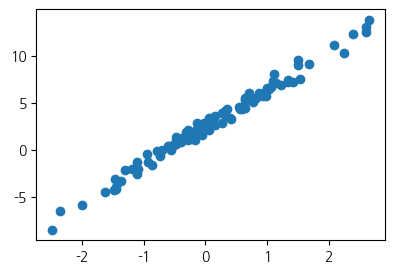

In [5]:
plt.plot(temp,sales,'o')

`-` 오늘 평균 기온이 0.5도이면 아이스 아메리카노가 얼마나 팔릴까?

#### B. 자료를 만든 방법

`-` 방법1 : $y_i= w_0+w_1 x_i +\epsilon_i = 2.5 + 4x_i +\epsilon_i, \quad i=1,2,\dots,n$

In [36]:
torch.manual_seed(43052)
x,_ = torch.randn(100).sort()
eps = torch.randn(100)*0.5
y = x * 4 + 2.5 + eps

`-` sort()를 하면 인덱스 항이 생겨서 필요없으므로 `_`에 저장

In [37]:
x[:5], y[:5]

(tensor([-2.4821, -2.3621, -1.9973, -1.6239, -1.4792]),
 tensor([-8.5420, -6.5767, -5.9496, -4.4794, -4.2516]))

`-` 방법2: ${\bf y}={\bf X}{\bf W} +\boldsymbol{\epsilon}$

-   ${\bf y}=\begin{bmatrix} y_1 \\ y_2 \\ \dots \\ y_n\end{bmatrix}, \quad {\bf X}=\begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \dots \\ 1 & x_n\end{bmatrix}, \quad {\bf W}=\begin{bmatrix} 2.5 \\ 4 \end{bmatrix}, \quad \boldsymbol{\epsilon}= \begin{bmatrix} \epsilon_1 \\ \dots \\ \epsilon_n\end{bmatrix}$

In [38]:
X = torch.stack([torch.ones(100),x],axis=1)
W = torch.tensor([[2.5],[4.0]])
y = X@W + eps.reshape(100,1)
x = X[:,[1]]

In [39]:
X[:5,:], y[:5,:]

(tensor([[ 1.0000, -2.4821],
         [ 1.0000, -2.3621],
         [ 1.0000, -1.9973],
         [ 1.0000, -1.6239],
         [ 1.0000, -1.4792]]),
 tensor([[-8.5420],
         [-6.5767],
         [-5.9496],
         [-4.4794],
         [-4.2516]]))

`-` true 와 관측값(observed data) 동시에 시각화

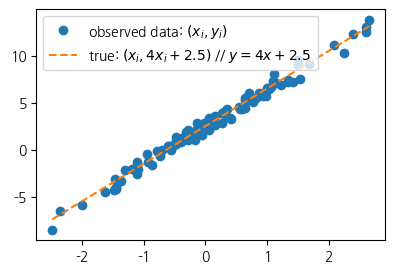

In [40]:
plt.plot(x,y,'o',label=r"observed data: $(x_i,y_i)$")
plt.plot(x,2.5+4*x,'--',label=r"true: $(x_i, 4x_i+2.5)$ // $y=4x+2.5$ ")
plt.legend()

#### C. 회귀분석

`-` 관측한 자료 $(x_i,y_i)$ 이 선형성을 가지고 있을 때 이를 파악하여 새로운 $x$가 주어졌을 때 $\hat{y}$(예측값)을 구할 수 있는 **적당한** 추세선을 찾는 것

`-` 좀 더 정확하게 말하면 $(x_1,y_1) \dots (x_n,y_n)$ 으로

$\begin{bmatrix} \hat{w}_0 \\ \hat{w}_1 \end{bmatrix}$ 를 최대한
$\begin{bmatrix} 2.5 \\ 4 \end{bmatrix}$와 비슷하게 찾는 것.

-   given data : $\big\{(x_i,y_i) \big\}_{i=1}^{n}$

-   parameter: ${\bf W}=\begin{bmatrix} w_0 \\ w_1 \end{bmatrix}$

-   estimated parameter:
    ${\bf \hat{W}}=\begin{bmatrix} \hat{w}_0 \\ \hat{w}_1 \end{bmatrix}$

`-` 추세선을 그리는 행위 = $(w_0,w_1)$을 선택하는일

### 4. 손실함수

`-` $(\hat{w}_0,\hat{w}_1)=(-5,10)$을 선택하여 선을 그려보고
적당한지 판단해보자

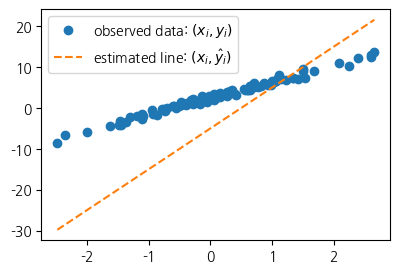

In [41]:
plt.plot(x,y,'o',label=r"observed data: $(x_i,y_i)$") 
What = torch.tensor([[-5.0],[10.0]])
plt.plot(x,X@What,'--',label=r"estimated line: $(x_i,\hat{y}_i)$")
plt.legend()

`-` 기울기와 절편 모두 너무 다르다

`-` $(\hat{w}_0,\hat{w}_1)=(2.5,3.5)$을 선택하여 선을 그려보고
적당한지 판단해보자

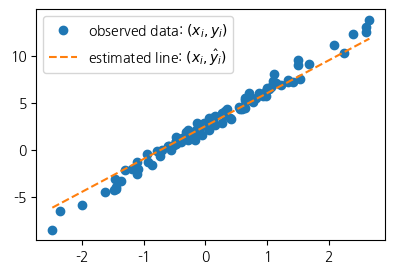

In [42]:
plt.plot(x,y,'o',label=r"observed data: $(x_i,y_i)$") 
What = torch.tensor([[2.5],[3.5]])
plt.plot(x,X@What,'--',label=r"estimated line: $(x_i,\hat{y}_i)$")
plt.legend()

`-` 기울기가 살짝 다른 듯 하다

`-` $(\hat{w}_0,\hat{w}_1)=(2.3,3.5)$을 선택하여 선을 그려보고
적당한지 판단해보자

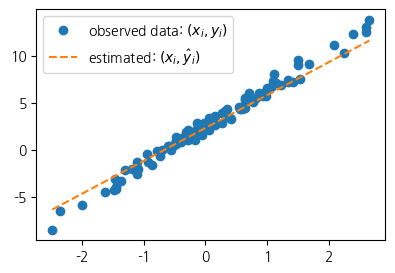

In [43]:
plt.plot(x,y,'o',label=r"observed data: $(x_i,y_i)$") 
What = torch.tensor([[2.3],[3.5]])
plt.plot(x,X@What,'--',label=r"estimated: $(x_i,\hat{y}_i)$")
plt.legend()

`-` $(\hat{w}_0,\hat{w}_1)=(2.5,3.5)$를 했을 때와 $(2.3,3,5)$ 로 했을 때 중 어떤 것이 더 적당한가?

#### A. loss 개념
`-` (2.5,3.5) 가 더 적당해야할 것 같긴 한데 육안으로 판단 어려움

`-` 이를 수식화하기 위해서 : loss의 개념 사용

* $loss = \sum_{i=1}^{n}(y_i- \hat{y}_i)^2 = \sum_{i=1}^{n}\big(y_i - (\hat{w}_0+\hat{w}_1x_i)\big)^2$

$=({\bf y}-\hat{\bf y})^\top({\bf y}-\hat{\bf y})=({\bf y}-{\bf X}\hat{\bf W})^\top({\bf y}-{\bf X}\hat{\bf W})$


#### B. loss의 특징
* $y_i \approx \hat{y}_i$ 일수록 loss 값이 작음
* $y_i \approx \hat{y}_i$ 이 되도록 $(\hat{w}_0, \hat{w}_1)$을 잘
    찍으면 loss 값이 작음
* 주황색 점선이 “적당할수록” loss 값이 작음

#### C. loss 사용

`-` 방법1 : $\sum_{i=1}^{n}(y_i- \hat{y}_i)^2$

In [45]:
What = torch.tensor([[2.5],[3.5]])
print(f"loss: {torch.sum((y - X@What)**2)}")

What = torch.tensor([[2.3],[3.5]])
print(f"loss: {torch.sum((y - X@What)**2)}")

loss: 55.074012756347656
loss: 59.3805046081543


`-` 방법2 : $({\bf y}-\hat{\bf y})^\top({\bf y}-\hat{\bf y})$

In [47]:
What = torch.tensor([[2.5],[3.5]])
print(f"loss: {(y - X@What).T @ (y - X@What)}")

What = torch.tensor([[2.3],[3.5]])
print(f"loss: {(y - X@What).T @ (y - X@What)}")

loss: tensor([[55.0740]])
loss: tensor([[59.3805]])


### 5. 파이토치를 이용한 반복추정

`-` 추정 전략 : 손실함수 + 경사하강법
* 1단계 : 아무 점선 긋기
* 2단계 : 1단계의 점선보다 loss값이 작은 하나의 직선으로 변경
* 3단계 : 1,2단계 반복

#### A. 1단계 - 최초 점선

`-` What 아무렇게나 설정

In [49]:
What = torch.tensor([[-5.0],[10.0]])
What

tensor([[-5.],
        [10.]])

In [50]:
yhat = X@What

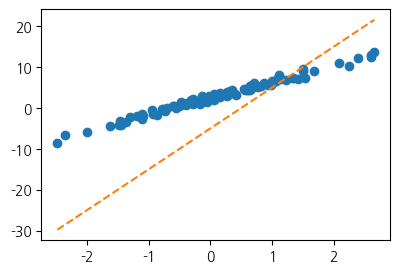

In [55]:
plt.plot(x,y,'o')
plt.plot(x,yhat.data,'--')

#### B. 2단계 - update

`-` '적당한 정도' : loss 값이 작을수록 적당함

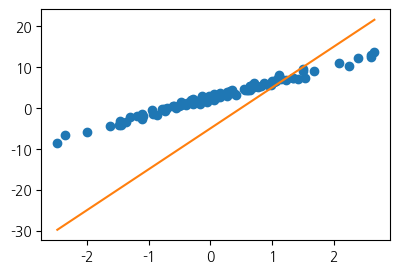

In [56]:
plt.plot(x,y,'o')
plt.plot(x,yhat)

In [57]:
loss = torch.sum((y-yhat)**2)
loss

tensor(8587.6875)

`-` 현재 loss(=8587.6875)를 줄여야함

* 최종적으로loss를 최소로 하는  $(\hat{w}_0,\hat{w}_1)$을 구해야함
* 함수의 최대값, 최소값을 컴퓨터로 찾는것 : '최적화'
* 최적화의 방법 : **경사하강법**

`-` 경사하강법 (1차원)

1.  임의의 점을 찍음
2.  그 점에서 순간기울기를 구함 (접선) \<– 미분
3.  순간기울기(=미분계수)의 부호와 반대방향으로 점을 이동

* 기울기의 절대값 크기와 비례하여 보폭(=움직이는 정도)을 조절
 $\to$ $\alpha$를 도입
* 최종수식 :$\hat{w} \leftarrow \hat{w} - \alpha \times \frac{\partial}{\partial w}loss(w)$

`-` 경사하강법 (2차원)

![](https://guebin.github.io/DL2024/posts/02wk-1_files/figure-html/cell-37-output-1.png)

1.  임의의 점을 찍음
2.  그 점에서 순간기울기를 구함 (접평면) \<– 편미분
3.  순간기울기(=미분계수)의 부호와 반대방향으로 ***각각*** 점을 이동

* 기울기의 절대값 크기와 비례하여 보폭(=움직이는 정도)을 ***각각*** 조절
 $\to$ $\alpha$를 도입

`-` 경사하강법 : loss를 줄이도록 $\hat{W}$를 개선하는 방법

* 수정값 = 원래값 - $\alpha$ $\times$ 기울어진 크기(=미분계수)
    * 미분계수와 반대방향으로 이동해야하기 때문에 마이너스 부호 사용
* $\alpha$는 전체적인 보폭 크기 결정, 클수록 한번에 update에서 움직임이 큼

`-` 우리가 구하고 싶은 것

* $\hat{W}^{LSE}=\underset{\hat{W}}argmin ~ loss(\hat{W})$

`-` 요약

* x,X,W,y // X = [1 x], W = [w0, w1] (회귀분석에서는 W=β)
* 회귀모형: y=X@W+ϵ = X@β+ϵ
* true: E(y)=X@W
* observed: (x,y)
* estimated W = What = [w0hat, w1hat]' <-- 아무값이나넣음 
* estimated y = yhat = X@What = X@β̂ 
* loss = yhat이랑 y랑 얼마나 비슷한지 = sum((y-yhat)^2)
* (x,y) 보고 최적의 선분을 그리는것 = loss를 가장 작게 만드는 What = [w0hat, w1hat] 를 찾는것
* 전략
    * (1) 아무 What나 찍는다
    * (2) 그거보다 더 나은 What을 찾는다.
    * (3) 1-2를 반복한다. 
* 전략2가 어려운데, 이를 수행하는 방법이 경사하강법 
* 경사하강법 알고리즘: 더나은What = 원래What - $\alpha$*미분값
* 수식 $$\hat{\bf W} \leftarrow \hat{\bf W} - \alpha \times \left.\frac{\partial}{\partial {\bf W}}loss({\bf W})\right|_{{\bf W}=\hat{\bf W}}$$

`-` 미분값 계산법 1) $\to$ 정확하지도 않고 번거로운 방법..

In [59]:
def l(w0,w1):
    yhat = w0 + w1*x
    return torch.sum((y-yhat)**2)

In [60]:
l(-5,10)

tensor(8587.6875)

In [61]:
h=0.001
print((l(-5+h,10) - l(-5,10))/h)
print((l(-5,10+h) - l(-5,10))/h)

tensor(-1341.7968)
tensor(1190.4297)


In [63]:
new = What - 0.001 * torch.tensor([[-1341.7968],[1190.4297]])
new

tensor([[-3.6582],
        [ 8.8096]])

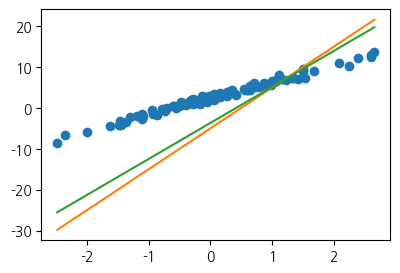

In [65]:
plt.plot(x,y,'o')
plt.plot(x,X@What,'-') # 원래What: 주황색
plt.plot(x,X@new,'-') # 더나은What: 초록색

`-` 수식

* 편미분
* $\frac{\partial}{\partial w_0}loss(w_0,w_1) \approx \frac{loss(w_0+h,w_1)-loss(w_0,w_1)}{h}$
* $\frac{\partial}{\partial w_1}loss(w_0,w_1) \approx \frac{loss(w_0,w_1+h)-loss(w_0,w_1)}{h}$

* 편미분 값을 이용
* $$\frac{\partial}{\partial {\bf W}}loss({\bf W}):= \begin{bmatrix} \frac{\partial}{\partial w_0} \\ \frac{\partial}{\partial w_1}\end{bmatrix}loss({\bf W}) =  \begin{bmatrix} \frac{\partial}{\partial w_0}loss({\bf W}) \\ \frac{\partial}{\partial w_1}loss({\bf W})\end{bmatrix}  =  \begin{bmatrix} \frac{\partial}{\partial w_0}loss(w_0,w_1) \\ \frac{\partial}{\partial w_1}loss(w_0,w_1)\end{bmatrix}$$

`-` 미분값 계산법 2) $\to$ 이것도 어려움...

* `loss` = `(y - XWhat)'(y -  XWhat)`
* = `(y'- What'X')(y - XWhat)`
* = `y'y - y'XWhat - What'X'y + What'X'XWhat` 
* loss를 What으로 미분
* `loss'` = `-X'y - X'y + 2X'XWhat`
$$\frac{\partial}{\partial {\bf W}}loss({\bf W})= -2{\bf X}^\top {\bf y} + 2{\bf X}^\top {\bf X}{\bf W}$$

In [66]:
-2*X.T@y + 2*X.T@X@What

tensor([[-1342.2524],
        [ 1188.9302]])

`-` 미분값 계산법 3) (★)

In [72]:
What = torch.tensor([[-5.0],[10.0]],requires_grad=True)
What

tensor([[-5.],
        [10.]], requires_grad=True)

In [73]:
yhat = X@What
loss = torch.sum((y-yhat)**2)
loss

tensor(8587.6875, grad_fn=<SumBackward0>)

`-` loss를 꼬리표의 근원인 What으로 미분

In [74]:
loss.backward() 

`-` What 에 미분값이 저장

In [75]:
What.grad

tensor([[-1342.2524],
        [ 1188.9305]])

`-` 미분 전

In [79]:
What = torch.tensor([[-5.0],[10.0]],requires_grad=True)
yhat = X@What
loss = torch.sum((y-yhat)**2)

In [80]:
What.data, What.grad

(tensor([[-5.],
         [10.]]),
 None)

In [82]:
loss.backward()

`-` 미분 후

In [83]:
What.data, What.grad

(tensor([[-5.],
         [10.]]),
 tensor([[-1342.2524],
         [ 1188.9305]]))

`-` **1회 업데이트 과정**

In [85]:
alpha=0.001
print(f"{What.data} -- 수정전")
print(f"{-alpha*What.grad} -- 수정하는폭")
print(f"{What.data-alpha*What.grad} -- 수정후")
print(f"{torch.tensor([[2.5],[4]])} -- 참값")

tensor([[-5.],
        [10.]]) -- 수정전
tensor([[ 1.3423],
        [-1.1889]]) -- 수정하는폭
tensor([[-3.6577],
        [ 8.8111]]) -- 수정후
tensor([[2.5000],
        [4.0000]]) -- 참값


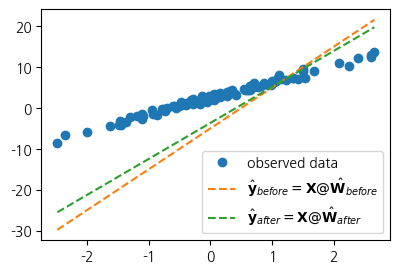

In [87]:
Wbefore = What.data
Wafter = What.data - alpha * What.grad
plt.plot(x,y,'o',label=r'observed data')
plt.plot(x,X@Wbefore,'--', label=r"$\hat{\bf y}_{before}={\bf X}@\hat{\bf W}_{before}$")
plt.plot(x,X@Wafter,'--', label=r"$\hat{\bf y}_{after}={\bf X}@\hat{\bf W}_{after}$")
plt.legend()

#### C. 3단계 - iteration

`-` **What.grad = None**을 꼭 해줘야함

* `loss.backward()` 의 역할
    * `What.grad` $\leftarrow$ `What.grad` + `What에서의미분값` 

In [88]:
What = torch.tensor([[-5.0],[10.0]],requires_grad=True) # 최초의 직선을 만드는 값
for epoc in range(30):
    yhat = X@What 
    loss = torch.sum((y-yhat)**2)
    loss.backward()
    What.data = What.data - 0.001 * What.grad
    What.grad = None 

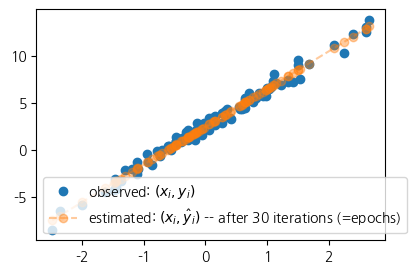

In [89]:
plt.plot(x,y,'o',label=r"observed: $(x_i,y_i)$")
plt.plot(x,X@What.data,'--o', label=r"estimated: $(x_i,\hat{y}_i)$ -- after 30 iterations (=epochs)", alpha=0.4 )
plt.legend()